 #  Plotting with xarray



 xarray provides plotting functionality built on matplotlib. Here are various examples:

In [4]:
import xarray as xr
import matplotlib.pyplot as plt
from weather_tools.read_silo_xarray import read_silo_xarray

# read a subset into memory to speed things up

ds = read_silo_xarray().sel(lat=slice(-39, -26), lon=slice(133, 154), time=slice("2020-01-01", "2025-01-01")).compute()



 Example 1: Simple time series plot of minimum temperature for a specific location

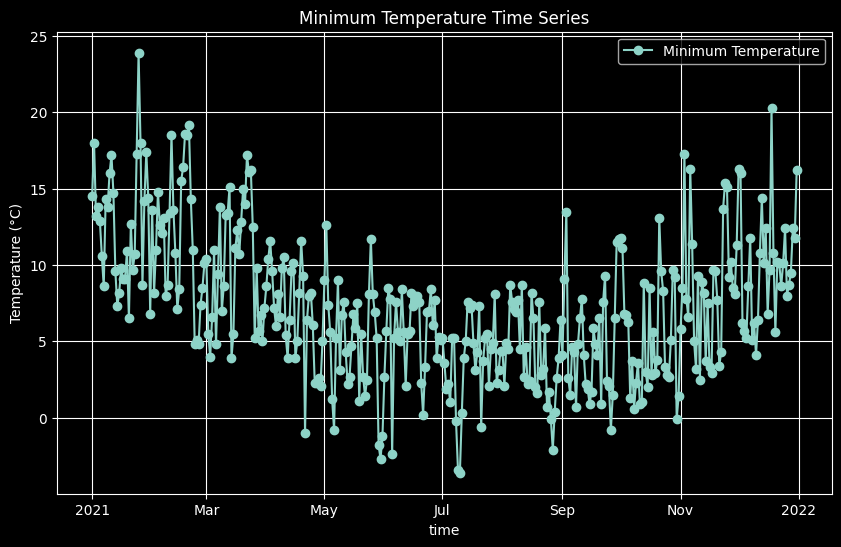

In [5]:
lat, lon = -36.6844306, 142.1867521
year = "2021"

ds_site = ds.sel(lat=lat, lon=lon, method="nearest").sel(time=year)

ds_site.min_temp.plot(figsize=(10, 6), marker="o", linestyle="-", label="Minimum Temperature")


plt.title("Minimum Temperature Time Series")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()


 Example 2: Comparing multiple variables - min_temp and max_temp over time

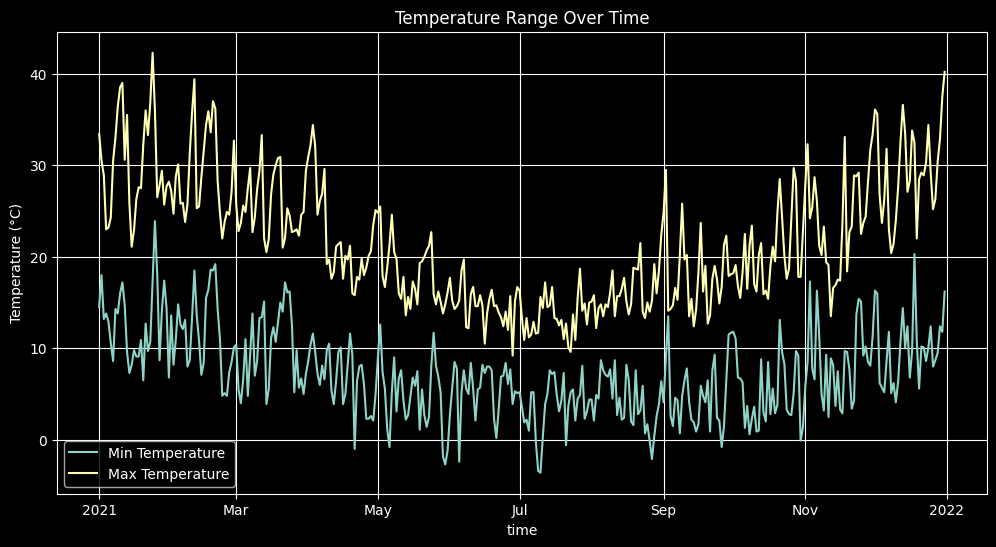

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
ds_site.min_temp.plot(ax=ax, label="Min Temperature")
ds_site.max_temp.plot(ax=ax, label="Max Temperature")
ax.set_title("Temperature Range Over Time")
ax.set_ylabel("Temperature (°C)")
ax.grid(True)
plt.legend()


 Example 3: Plotting a heatmap of maximum temperature for a month

Text(0.5, 1.0, 'Maximum Temperature - January 2021')

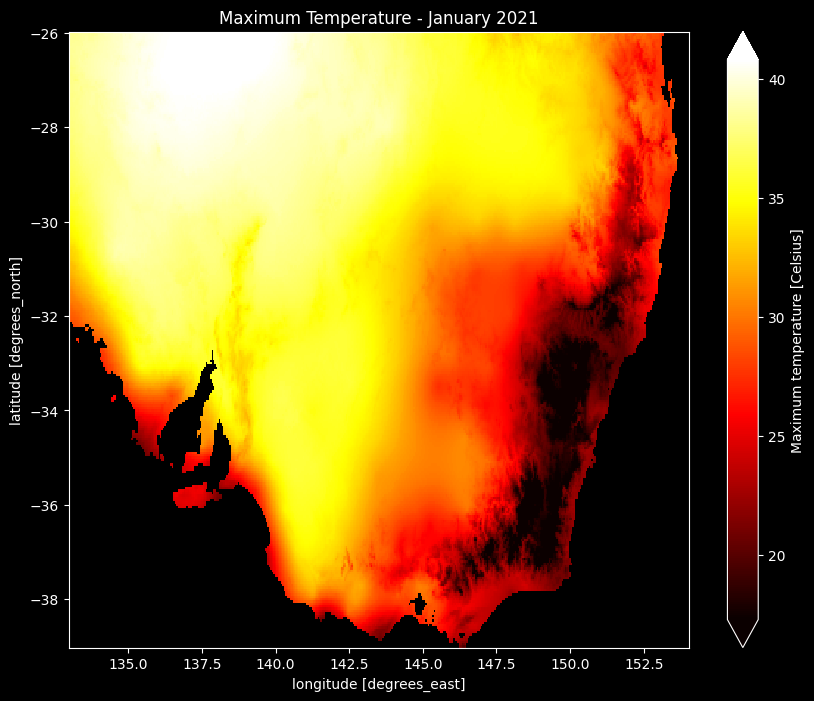

In [7]:
ds.sel(time="2021-01-01").max_temp.plot.pcolormesh(figsize=(10, 8), cmap="hot", robust=True)
plt.title("Maximum Temperature - January 2021")


 Example 4: Creating a contour plot of rainfall

Text(0.5, 1.0, 'Rainfall Contour Map - February 2021')

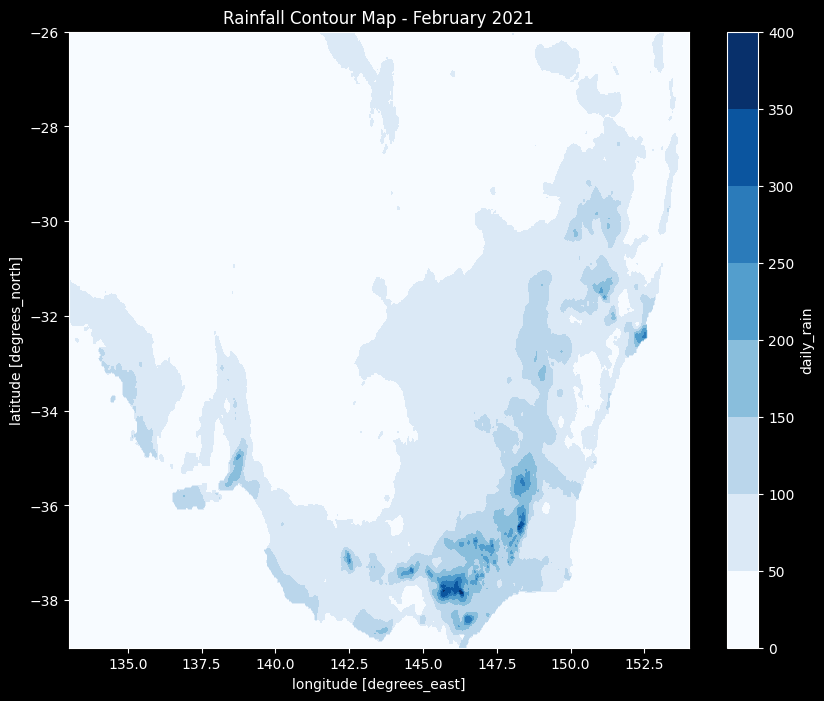

In [8]:
(
    ds.sel(time=slice("2021-06-01", "2021-07-01"))
    .daily_rain.sum(dim=["time"])
    .plot.contourf(figsize=(10, 8), levels=10, cmap="Blues")
)
plt.title("Rainfall Contour Map - February 2021")


 Example 5: Seasonal average - create a multi-panel plot showing seasonal averages

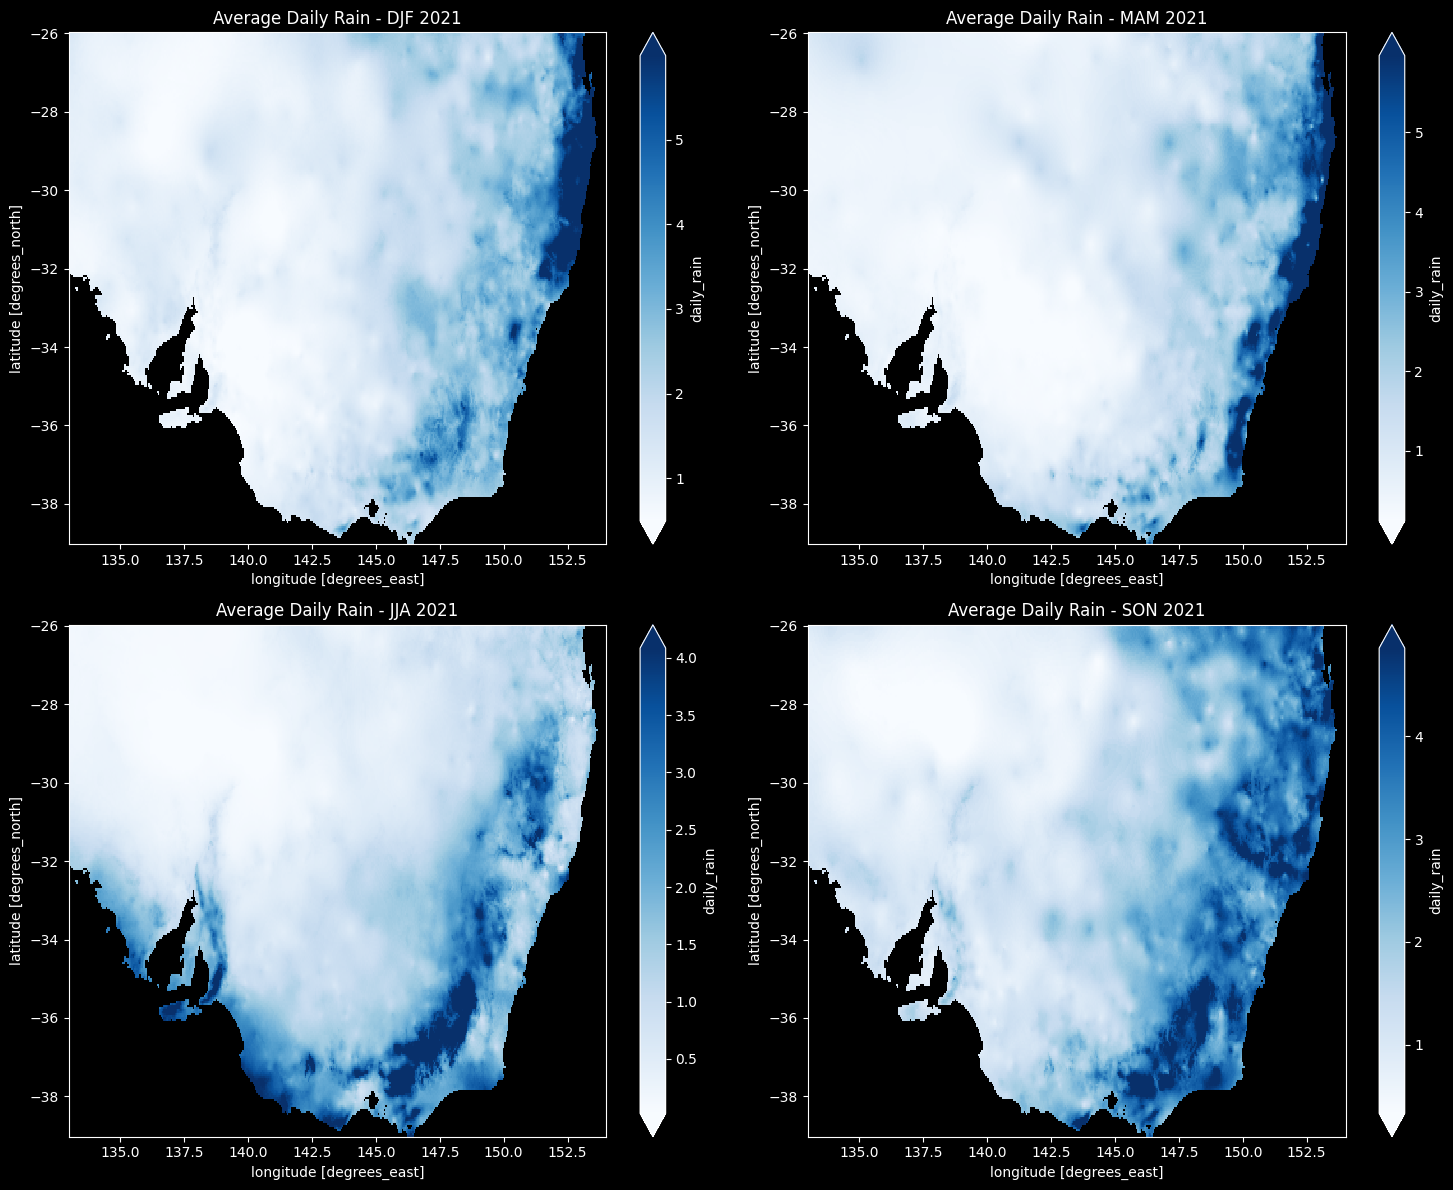

In [9]:
seasons = {"DJF": [12, 1, 2], "MAM": [3, 4, 5], "JJA": [6, 7, 8], "SON": [9, 10, 11]}
seasonal_data = {}

# Filter and average by season
for season, months in seasons.items():
    # For December, we need to use the previous year
    if season == "DJF":
        dec_data = ds.sel(time=((ds.time.dt.month == 12) & (ds.time.dt.year == 2020)))
        jan_feb_data = ds.sel(time=(ds.time.dt.month == 1) | (ds.time.dt.month == 2) & (ds.time.dt.year == 2021))
        seasonal_data[season] = xr.concat([dec_data, jan_feb_data], dim="time").mean("time")
    else:
        month_data = ds.sel(time=ds.time.dt.month.isin(months) & (ds.time.dt.year == 2021))
        seasonal_data[season] = month_data.mean("time")

# Create multi-panel plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (season, data) in enumerate(seasonal_data.items()):
    data.daily_rain.plot(ax=axes[i], cmap="Blues", robust=True)
    axes[i].set_title(f"Average Daily Rain - {season} 2021")

plt.tight_layout()


 Example 6: Creating a histogram of annual rainfall distribution in each grid cell.

Text(0, 0.5, 'Frequency')

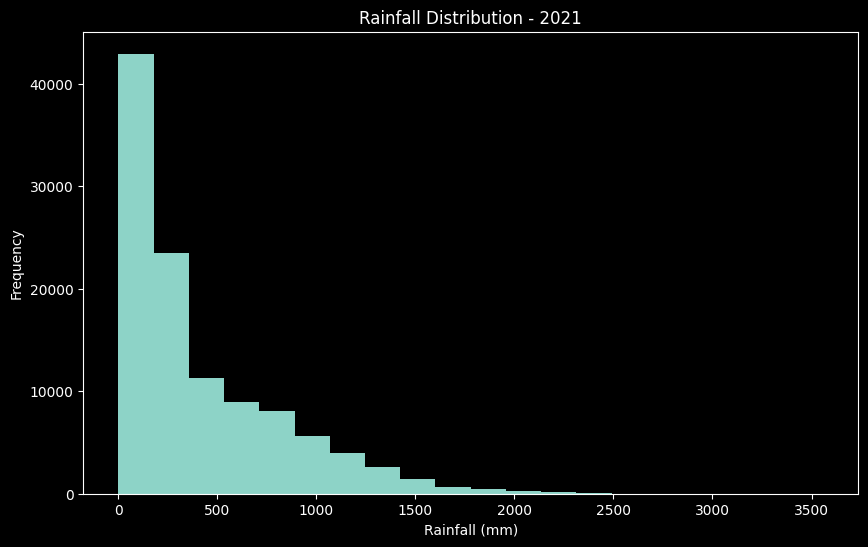

In [10]:
ds.sel(time="2021").daily_rain.sum(dim=["time"]).plot.hist(figsize=(10, 6), bins=20)
plt.title("Rainfall Distribution - 2021")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")


 Example 7: hovmoller diagram (time vs. latitude)

Text(0.5, 1.0, 'Hovmoller Diagram: Max Temperature across Latitudes (Longitude: 142.19)')

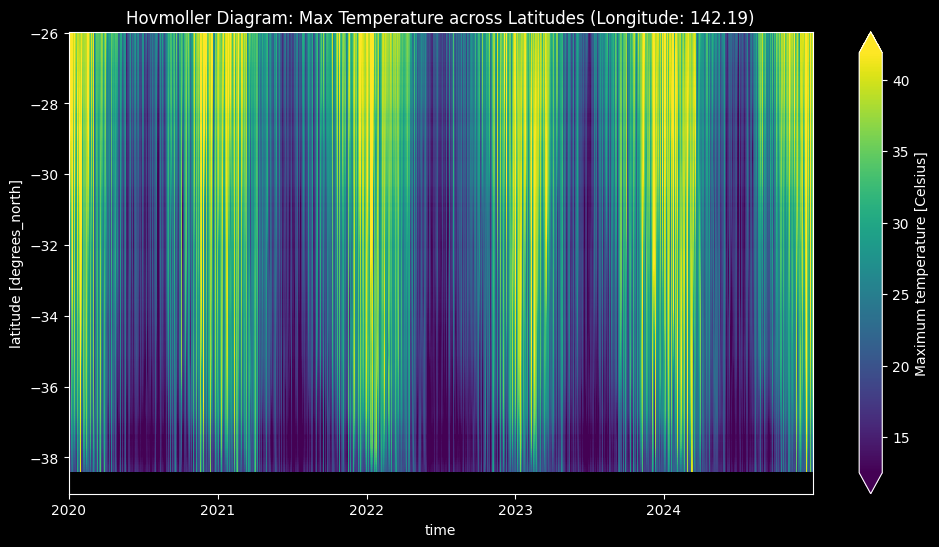

In [11]:
# Select a slice along a specific longitude
hovmoller = ds.sel(lon=lon, method="nearest").max_temp
hovmoller.plot(x="time", y="lat", figsize=(12, 6), cmap="viridis", robust=True)
plt.title(f"Hovmoller Diagram: Max Temperature across Latitudes (Longitude: {lon:.2f})")



 Example 9: Facet plot for different variables

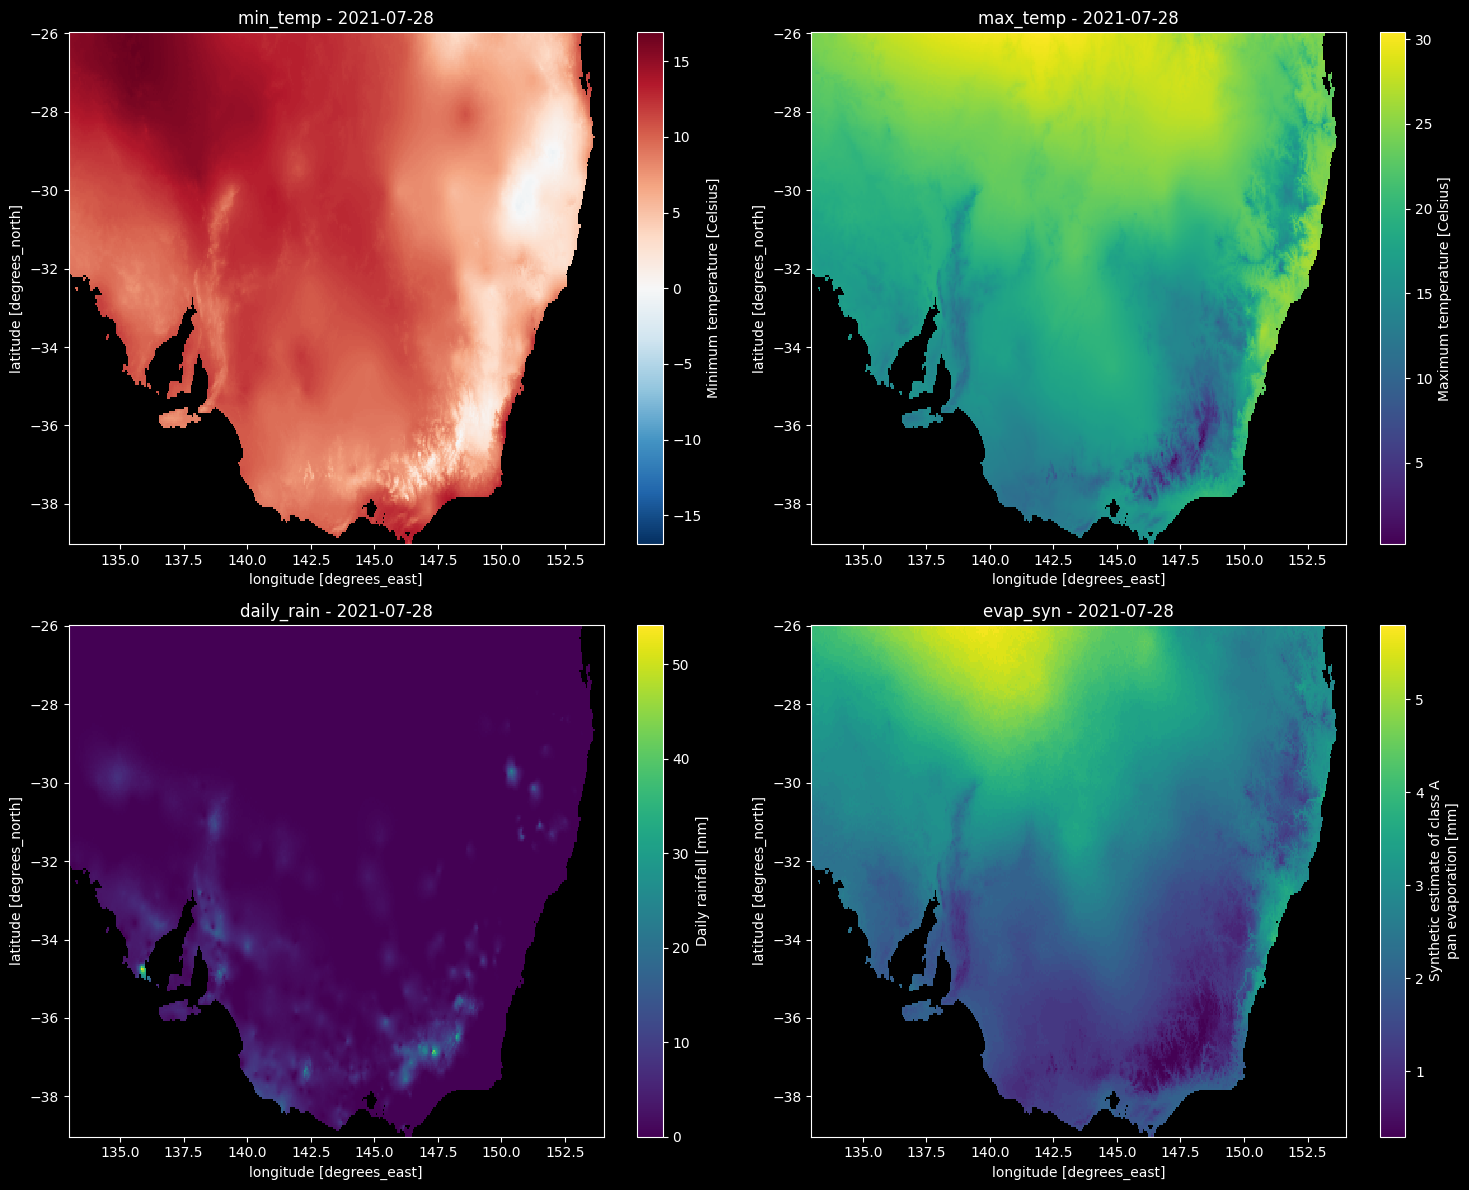

In [12]:
variables = ["min_temp", "max_temp", "daily_rain", "evap_syn"]
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, var in enumerate(variables):
    ds.sel(time="2021-07-28")[var].plot(ax=axes[i])
    axes[i].set_title(f"{var} - 2021-07-28")

plt.tight_layout()


 Example 10: Plot annual cycle using monthly averages for specific location

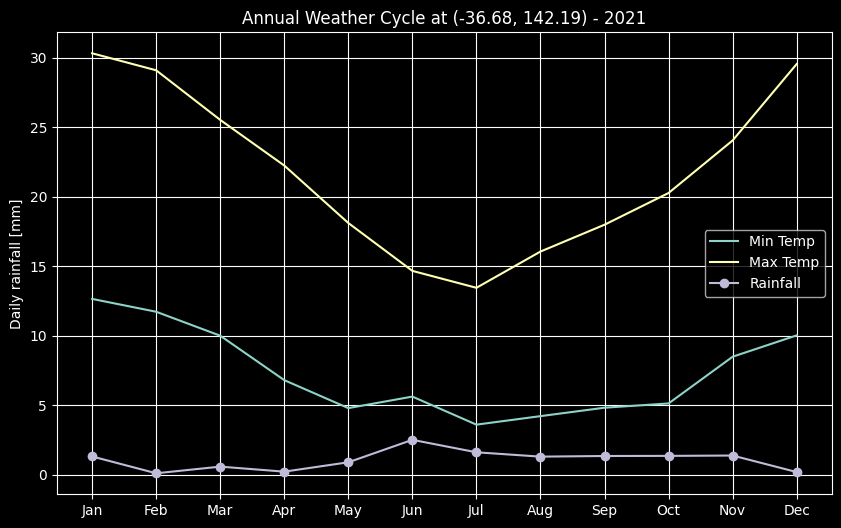

In [13]:
annual_cycle = ds_site.groupby("time.month").mean()
fig, ax = plt.subplots(figsize=(10, 6))
annual_cycle.min_temp.plot(ax=ax, label="Min Temp")
annual_cycle.max_temp.plot(ax=ax, label="Max Temp")
annual_cycle.daily_rain.plot(ax=ax, label="Rainfall", marker="o", linestyle="-")
ax.set_xticks(range(1, 13))
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax.set_title(f"Annual Weather Cycle at ({lat:.2f}, {lon:.2f}) - 2021")
ax.set_xlabel("")
ax.legend()
plt.grid(True)
